#### The main goal of this analysis is to explore the correlation between students' academic performance and their mental health condition.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(
    'data/processed/cleaned_data.csv',
)

In [3]:
df.head(5)

,timestamp,gender,age,course,study_year,cgpa,marital_status,depression,anxiety,panic_attack,specialist_consultation_status
0,2020-07-08 12:02:00,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,2020-07-08 12:04:00,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,2020-07-08 12:05:00,Male,19.0,BIT,year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,2020-07-08 12:06:00,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,2020-07-08 12:13:00,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


Interestingly, despite the presence of mental health concerns, only a small proportion of students reported consulting a specialist.

In [6]:
df.specialist_consultation_status.value_counts()

specialist_consultation_status
No     94
Yes     6
Name: count, dtype: int64

From this, it can be concluded that mental health remains an issue that is often overlooked in educational environments.

Now, let’s explore the correlation between marital status and mental health among students.

In [23]:
married_students = df[df.marital_status == 'Yes'].shape[0]
students = df.shape[0]
print(f"Total number of students: {students}")
print(f"Number of married students: {married_students}")

Total number of students: 100
Number of married students: 16


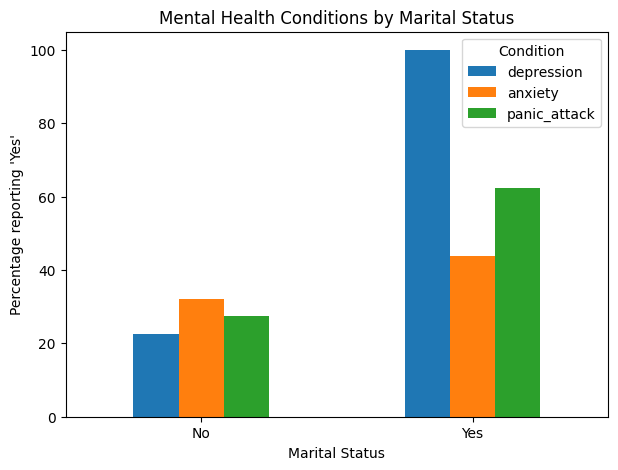

In [31]:
summary = {}
for col in df[['depression', 'anxiety', 'panic_attack']]:
    summary[col] = (
        pd.crosstab(df['marital_status'], df[col], normalize='index')
        .get('Yes', 0) * 100
    )

summary_df = pd.DataFrame(summary)

# Plot
summary_df.plot(kind='bar', figsize=(7, 5))
plt.title("Mental Health Conditions by Marital Status")
plt.ylabel("Percentage reporting 'Yes'")
plt.xlabel("Marital Status")
plt.xticks(rotation=0)
plt.legend(title="Condition")
plt.show()